## Setup

In [1]:
# Packages
import pandas as pd
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import math

In [2]:
# Import data
tor_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/train_with_econ_wout_zeros.csv")


# Quick inspection
tor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8237 entries, 0 to 8236
Data columns (total 27 columns):
EVENT_ID              8237 non-null int64
DAMAGE_PROPERTY       8237 non-null float64
DURATION_SECONDS      8237 non-null float64
BEGIN_LAT             8237 non-null float64
BEGIN_LON             8237 non-null float64
TOR_LENGTH            8237 non-null float64
TOR_WIDTH             8237 non-null float64
BEGIN_DATE_TIME       8237 non-null float64
YEAR                  8237 non-null int64
CZ_NAME               8237 non-null object
STATE                 8237 non-null object
OPEN_WATER_PROP       8237 non-null float64
DEV_OPEN_PROP         8237 non-null float64
DEV_LOW_PROP          8237 non-null float64
DEV_MED_PROP          8237 non-null float64
DEV_HIGH_PROP         8237 non-null float64
DECID_FOREST_PROP     8237 non-null float64
EVERGR_FOREST_PROP    8237 non-null float64
MIXED_FOREST_PROP     8237 non-null float64
SHRUB_SCRUB_PROP      8237 non-null float64
GRASS_LAND_PROP    

In [3]:
# Seperating variables
# The dependent variables
tornado_outcomes = tor_df.iloc[:, [1]]


# Quick inspection
tornado_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8237 entries, 0 to 8236
Data columns (total 1 columns):
DAMAGE_PROPERTY    8237 non-null float64
dtypes: float64(1)
memory usage: 64.4 KB


In [4]:
# The independent variables
tornado_features = tor_df.iloc[:, 2:]


# Get rid of year and county name
tornado_features = tornado_features.drop(["YEAR",
                                          "CZ_NAME",
                                          "STATE"],
                                         axis = 1)



# Quick inspection
tornado_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8237 entries, 0 to 8236
Data columns (total 22 columns):
DURATION_SECONDS      8237 non-null float64
BEGIN_LAT             8237 non-null float64
BEGIN_LON             8237 non-null float64
TOR_LENGTH            8237 non-null float64
TOR_WIDTH             8237 non-null float64
BEGIN_DATE_TIME       8237 non-null float64
OPEN_WATER_PROP       8237 non-null float64
DEV_OPEN_PROP         8237 non-null float64
DEV_LOW_PROP          8237 non-null float64
DEV_MED_PROP          8237 non-null float64
DEV_HIGH_PROP         8237 non-null float64
DECID_FOREST_PROP     8237 non-null float64
EVERGR_FOREST_PROP    8237 non-null float64
MIXED_FOREST_PROP     8237 non-null float64
SHRUB_SCRUB_PROP      8237 non-null float64
GRASS_LAND_PROP       8237 non-null float64
PASTURE_HAY_PROP      8237 non-null float64
CULT_CROPS_PROP       8237 non-null float64
WOOD_WETLAND_PROP     8237 non-null float64
HERB_WETLAND_PROP     8237 non-null float64
BARREN_LAND_P

In [5]:
# Make the dependent variables into a numpy array
outcomes_array = tornado_outcomes.values


# Makes the numpy array into a torch Tensor
outcomes_Tensor = torch.from_numpy(outcomes_array)


# Quick inspection
outcomes_Tensor


 0.8345
 1.0039
 0.2808
   ⋮    
 0.8758
 0.8436
 1.0908
[torch.DoubleTensor of size 8237x1]

In [6]:
# Make the independent variables into a numpy array
features_array = tornado_features.values


# Make the numpy array into a torch Tensor
features_Tensor = torch.from_numpy(features_array)


# Quick inspection
features_Tensor


 3.5355e-01  1.2369e-02  8.2870e-01  ...  -1.0901e+00 -3.2988e-01 -1.5643e+00
-3.0101e-01 -1.7453e-01  1.3078e+00  ...  -1.0901e+00 -1.3014e-01 -9.0186e-01
 2.1715e-01  9.1283e-01  2.3688e+00  ...   1.6831e+00  1.2739e+00  2.1723e+00
                ...                   ⋱                   ...                
 5.4605e-01 -5.0102e-02  6.1062e-01  ...  -1.0901e+00 -8.9784e-01 -1.8858e-01
 9.1370e-01  3.5682e-01 -1.1303e+00  ...  -1.0901e+00 -8.9784e-01  1.9785e+00
 1.3713e+00 -6.6390e-01  4.7054e-01  ...  -6.9096e-01 -1.3006e-01 -1.1576e+00
[torch.DoubleTensor of size 8237x22]

### Convert DoubleTensor to FloatTensor

In [7]:
# Changing dependent variables from a DoubleTensor to a FloatTensor
outcomes_Tensor = outcomes_Tensor.float()


# ...and for the independent variables
features_Tensor = features_Tensor.float()


# Quick check
features_Tensor


 3.5355e-01  1.2369e-02  8.2870e-01  ...  -1.0901e+00 -3.2988e-01 -1.5643e+00
-3.0101e-01 -1.7453e-01  1.3078e+00  ...  -1.0901e+00 -1.3014e-01 -9.0186e-01
 2.1715e-01  9.1283e-01  2.3688e+00  ...   1.6831e+00  1.2739e+00  2.1723e+00
                ...                   ⋱                   ...                
 5.4605e-01 -5.0102e-02  6.1062e-01  ...  -1.0901e+00 -8.9784e-01 -1.8858e-01
 9.1370e-01  3.5682e-01 -1.1303e+00  ...  -1.0901e+00 -8.9784e-01  1.9785e+00
 1.3713e+00 -6.6390e-01  4.7054e-01  ...  -6.9096e-01 -1.3006e-01 -1.1576e+00
[torch.FloatTensor of size 8237x22]

## Round 1: One-Hidden-Layer Neural Network

In [8]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [9]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(22, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 1))

In [10]:
# Set the loss function
loss_fn = torch.nn.MSELoss(size_average=False)

In [11]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 4e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

In [12]:
# Get the iterations
iterations = list(range(0, 10000))

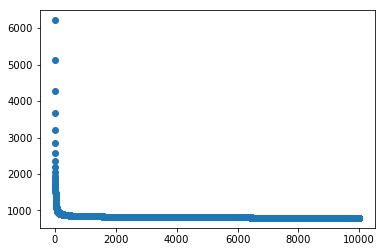

In [13]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [14]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8237)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

In [15]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
outcomes_Variable_resized = outcomes_Variable.resize(8237)


# Make the FloatTensor into a numpy.array
outcomes_array = outcomes_Variable_resized.data.numpy()


# Make the numpy.array into a list
outcomes_list = outcomes_array.tolist()

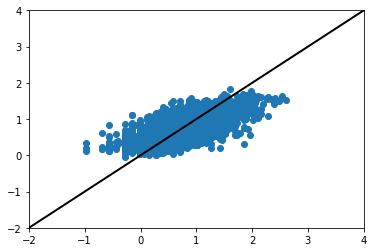

In [16]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 1.1: Validation Set Performance

In [17]:
# Import data
valid_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/cv_with_econ_wout_zeros.csv")


# Validation set outcomes
valid_outcomes = valid_df.iloc[:, [1]]


# Make the validation outcomes into a numpy array
valid_outcomes_array = valid_outcomes.values


# Makes the numpy array into a torch Tensor
valid_outcomes_Tensor = torch.from_numpy(valid_outcomes_array)


# Changing validation outcomes from a DoubleTensor to a FloatTensor
valid_outcomes_Tensor = valid_outcomes_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_outcomes_Variable = Variable(valid_outcomes_Tensor)

In [18]:
# Validation set predictors
valid_predictors = valid_df.iloc[:, 2:]

valid_predictors = valid_predictors.drop(["YEAR",
                                          "CZ_NAME",
                                          "STATE"],
                                         axis = 1)


# Make the validation predictors into a numpy array
valid_predictors_array = valid_predictors.values


# Makes the numpy array into a torch Tensor
valid_predictors_Tensor = torch.from_numpy(valid_predictors_array)


# Changing validation predictors from a DoubleTensor to a FloatTensor
valid_predictors_Tensor = valid_predictors_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_predictors_Variable = Variable(valid_predictors_Tensor)

In [19]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(22, 15),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(15, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight
dim_corrected_model[(2)].weight = model[(2)].weight

In [20]:
# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 413.0975
[torch.FloatTensor of size 1]

In [21]:
valid_predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Data columns (total 22 columns):
DURATION_SECONDS      2730 non-null float64
BEGIN_LAT             2730 non-null float64
BEGIN_LON             2730 non-null float64
TOR_LENGTH            2730 non-null float64
TOR_WIDTH             2730 non-null float64
BEGIN_DATE_TIME       2730 non-null float64
OPEN_WATER_PROP       2730 non-null float64
DEV_OPEN_PROP         2730 non-null float64
DEV_LOW_PROP          2730 non-null float64
DEV_MED_PROP          2730 non-null float64
DEV_HIGH_PROP         2730 non-null float64
DECID_FOREST_PROP     2730 non-null float64
EVERGR_FOREST_PROP    2730 non-null float64
MIXED_FOREST_PROP     2730 non-null float64
SHRUB_SCRUB_PROP      2730 non-null float64
GRASS_LAND_PROP       2730 non-null float64
PASTURE_HAY_PROP      2730 non-null float64
CULT_CROPS_PROP       2730 non-null float64
WOOD_WETLAND_PROP     2730 non-null float64
HERB_WETLAND_PROP     2730 non-null float64
BARREN_LAND_P

In [23]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2730)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

In [24]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
valid_outcomes_Variable_resized = valid_outcomes_Variable.resize(2730)


# Make the FloatTensor into a numpy.array
valid_outcomes_array = valid_outcomes_Variable_resized.data.numpy()


# Make the numpy.array into a list
valid_outcomes_list = valid_outcomes_array.tolist()

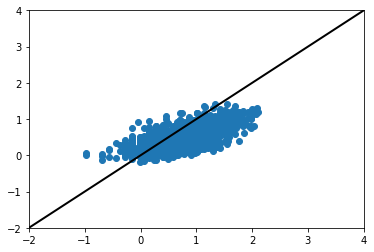

In [25]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 1.2: Test Set Performance

In [26]:
# Import data
test_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/test_with_econ_wout_zeros.csv")


# Validation set outcomes
test_outcomes = test_df.iloc[:, [1]]


# Make the validation outcomes into a numpy array
test_outcomes_array = test_outcomes.values


# Makes the numpy array into a torch Tensor
test_outcomes_Tensor = torch.from_numpy(test_outcomes_array)


# Changing validation outcomes from a DoubleTensor to a FloatTensor
test_outcomes_Tensor = test_outcomes_Tensor.float()


# Make the Tensor into a Pytorch Variable
test_outcomes_Variable = Variable(test_outcomes_Tensor)

In [27]:
# Validation set predictors
test_predictors = test_df.iloc[:, 2:]

test_predictors = test_predictors.drop(["YEAR",
                                        "CZ_NAME",
                                        "STATE"],
                                       axis = 1)


# Make the validation predictors into a numpy array
test_predictors_array = test_predictors.values


# Makes the numpy array into a torch Tensor
test_predictors_Tensor = torch.from_numpy(test_predictors_array)


# Changing validation predictors from a DoubleTensor to a FloatTensor
test_predictors_Tensor = test_predictors_Tensor.float()


# Make the Tensor into a Pytorch Variable
test_predictors_Variable = Variable(test_predictors_Tensor)

In [28]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model_2 = torch.nn.Sequential(torch.nn.Linear(22, 15),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(15, 1))


# Give the new model the old model's parameters
dim_corrected_model_2[(0)].weight = model[(0)].weight
dim_corrected_model_2[(2)].weight = model[(2)].weight

In [29]:
# Get the validation set predictions
y_test_pred = dim_corrected_model_2(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 281.9453
[torch.FloatTensor of size 1]

In [30]:
test_predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2724 entries, 0 to 2723
Data columns (total 22 columns):
DURATION_SECONDS      2724 non-null float64
BEGIN_LAT             2724 non-null float64
BEGIN_LON             2724 non-null float64
TOR_LENGTH            2724 non-null float64
TOR_WIDTH             2724 non-null float64
BEGIN_DATE_TIME       2724 non-null float64
OPEN_WATER_PROP       2724 non-null float64
DEV_OPEN_PROP         2724 non-null float64
DEV_LOW_PROP          2724 non-null float64
DEV_MED_PROP          2724 non-null float64
DEV_HIGH_PROP         2724 non-null float64
DECID_FOREST_PROP     2724 non-null float64
EVERGR_FOREST_PROP    2724 non-null float64
MIXED_FOREST_PROP     2724 non-null float64
SHRUB_SCRUB_PROP      2724 non-null float64
GRASS_LAND_PROP       2724 non-null float64
PASTURE_HAY_PROP      2724 non-null float64
CULT_CROPS_PROP       2724 non-null float64
WOOD_WETLAND_PROP     2724 non-null float64
HERB_WETLAND_PROP     2724 non-null float64
BARREN_LAND_P

In [31]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2724)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.735285 + 6.490682


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

In [32]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
test_outcomes_Variable_resized = test_outcomes_Variable.resize(2724)


# Make the FloatTensor into a numpy.array
test_outcomes_array = test_outcomes_Variable_resized.data.numpy()


# Convert back to native units and scale
test_outcomes_array = test_outcomes_array*5.735285 + 6.490682


# Make the numpy.array into a list
test_outcomes_list = test_outcomes_array.tolist()

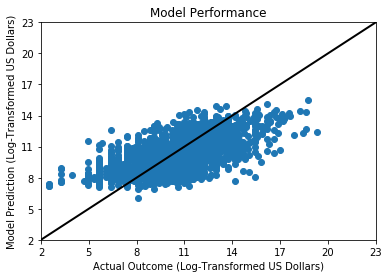

In [33]:
# Plot new predictions versus new data outcomes

plt.scatter(test_outcomes_list, y_test_pred_list)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [34]:
dim_corrected_model_2[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.0683 -0.1498  0.0573 -0.0454  0.1956 -0.1439 -0.1237  0.1088  0.0788  0.0129
 0.0933  0.2404  0.1538 -0.0260  0.0041  0.0347 -0.0511  0.0280 -0.1043 -0.2597
-0.1098  0.1184  0.0555 -0.1435  0.1043 -0.0692 -0.0502 -0.0147 -0.0557 -0.0407
-0.0851  0.1259  0.0150 -0.2660 -0.0102  0.0990 -0.1730 -0.1488 -0.0616 -0.0388
-0.0637  0.1198  0.1180  0.1221  0.3466 -0.1650  0.0691 -0.2043  0.0714  0.0171
 0.1687 -0.2668  0.0113 -0.0660  0.1519 -0.0474  0.0644  0.0677  0.0184  0.0846
-0.0441  0.0982 -0.0126 -0.0335 -0.1608  0.1323  0.0160 -0.1732 -0.0107 -0.1386
-0.1016 -0.0185  0.0387 -0.1203 -0.0085 -0.1181  0.1400  0.0214  0.0136  0.1741
 0.1364 -0.0905 -0.0826  0.0267  0.1849  0.0664 -0.0215  0.1024  0.1668 -0.1254
 0.1754 -0.3056 -0.0599  0.1554 -0.0175  0.0700 -0.0777  0.0099 -0.0241  0.1561
 0.0268  0.0034 -0.0722 -0.1354  0.2303 -0.1312  0.0151  0.1025 -0.1421 -0.1170
-0.0319 -0.0689  0.1949  0.0771 -0.1369 -0.0695 -0.0940 -0.1633  0.2216 -0.0595
-

In [35]:
dim_corrected_model_2[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.0475  0.2281  0.1537 -0.1903  0.2617  0.0201 -0.0611 -0.1060  0.2565  0.0944

Columns 10 to 14 
-0.2595  0.0301  0.2184  0.1636  0.2064
[torch.FloatTensor of size 1x15]

## Round 2: Two-Hidden-Layer Neural Network

In [36]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [37]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(22, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 10),
                            torch.nn.ReLU(),
                            torch.nn.Linear(10, 1))

In [38]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 6e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

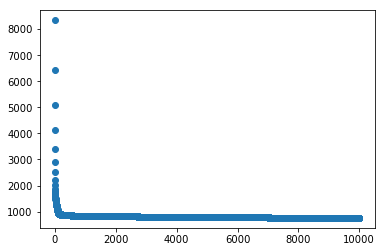

In [39]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [40]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8237)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

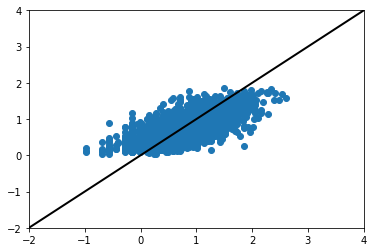

In [41]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 2.1: Validation Set Performance

In [42]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(22, 15),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(15, 10),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(10, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight
dim_corrected_model[(2)].weight = model[(2)].weight
dim_corrected_model[(4)].weight = model[(4)].weight

In [43]:
# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 514.0609
[torch.FloatTensor of size 1]

In [45]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2730)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

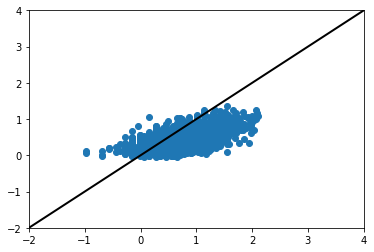

In [46]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 2.2: Test Set Performance

In [47]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model_2 = torch.nn.Sequential(torch.nn.Linear(22, 15),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(15, 10),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(10, 1))


# Give the new model the old model's parameters
dim_corrected_model_2[(0)].weight = model[(0)].weight
dim_corrected_model_2[(2)].weight = model[(2)].weight
dim_corrected_model_2[(4)].weight = model[(4)].weight

In [48]:
# Get the validation set predictions
y_test_pred = dim_corrected_model_2(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 513.1083
[torch.FloatTensor of size 1]

In [49]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2724)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.735285 + 6.490682


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

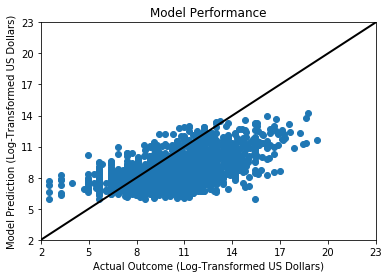

In [50]:
# Plot new predictions versus new data outcomes

plt.scatter(test_outcomes_list, y_test_pred_list)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [51]:
dim_corrected_model_2[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.1350 -0.4063 -0.1008  0.1333  0.2403  0.0229  0.0159 -0.0658  0.1615 -0.0760
-0.0282  0.1983 -0.1394  0.1582  0.0855  0.1173  0.0751  0.0411  0.1446  0.1488
 0.0430 -0.0107 -0.0272 -0.1804  0.0347  0.1969  0.0224 -0.0596  0.0785 -0.0356
 0.0375  0.0453  0.2825 -0.0765  0.0738 -0.0561 -0.1651  0.1725 -0.0057  0.1409
 0.2322  0.2824 -0.1216 -0.0088 -0.0924 -0.1533 -0.0508 -0.0799 -0.1325  0.0019
 0.2093  0.0684 -0.2020  0.0418  0.1525  0.1338 -0.0195  0.0527 -0.1115  0.0297
 0.1521 -0.3203  0.0394 -0.2301 -0.1635 -0.1218 -0.0630  0.0643  0.0323  0.2942
 0.1335  0.1597  0.1285  0.2193 -0.1652 -0.1269  0.0458  0.2444  0.1617  0.0762
-0.1549 -0.0966  0.0442  0.1300  0.3856  0.1502 -0.0421  0.1300  0.1257 -0.1125
 0.0544  0.2964  0.3578  0.1405  0.2291 -0.1911  0.0009 -0.1565 -0.1253  0.1498
-0.2184  0.0087 -0.0706 -0.3875 -0.2193  0.1495 -0.0041  0.2259 -0.3120  0.1097
 0.0388 -0.0769 -0.1335 -0.3078  0.2956 -0.0005  0.0110 -0.1189 -0.0041 -0.0699
-

In [52]:
dim_corrected_model_2[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.2917  0.0545 -0.0979  0.0133 -0.1986 -0.1115  0.1102 -0.0601  0.2832 -0.0902
-0.0786  0.1889  0.1150  0.2346  0.1767  0.0941  0.1331  0.0908  0.2501  0.1280
 0.1887 -0.1284  0.2921 -0.2856  0.0866  0.1880 -0.2371  0.0164 -0.0242  0.0160
 0.1334  0.0724 -0.1381 -0.0554 -0.1739  0.2104  0.1895 -0.1186  0.0518  0.3031
-0.0408 -0.1086  0.2387  0.0764  0.1060 -0.1604 -0.1423  0.1214  0.1786  0.1861
 0.1742 -0.0588  0.1264  0.1425 -0.1920  0.1594  0.2362  0.1778 -0.0281 -0.0406
-0.0024  0.0404  0.0125  0.0375 -0.3118 -0.0905 -0.2998 -0.0293  0.0736 -0.3161
 0.2314  0.0505 -0.1520  0.0986 -0.0022  0.0111 -0.1674  0.0781  0.3064  0.0644
-0.2232 -0.0241 -0.0795 -0.2160  0.0611  0.2115 -0.0102 -0.0021 -0.0130 -0.1074
-0.2670 -0.1595  0.0692  0.1734  0.0920  0.0339 -0.2004 -0.2299  0.3534  0.0565

Columns 10 to 14 
 0.0530 -0.3232 -0.0662 -0.0364  0.0673
-0.1625  0.2143 -0.2472  0.0854 -0.0331
-0.1794  0.1199  0.1196 -0.1980 -0.0928
-0.0463  0.2216 -0.063

In [53]:
dim_corrected_model_2[(4)].weight

Parameter containing:
 0.2987 -0.2842 -0.4536  0.4643  0.3487 -0.0920 -0.6277  0.6121  0.2562 -0.3864
[torch.FloatTensor of size 1x10]

## Round 3: Three-Hidden-Layers Neural Network

In [54]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [55]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(22, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 10),
                            torch.nn.ReLU(),
                            torch.nn.Linear(10, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 1))

In [56]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 5e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

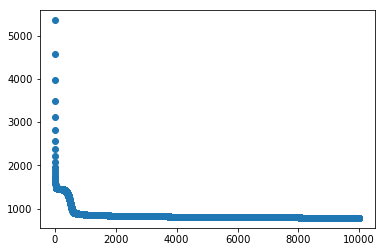

In [57]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [58]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8237)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

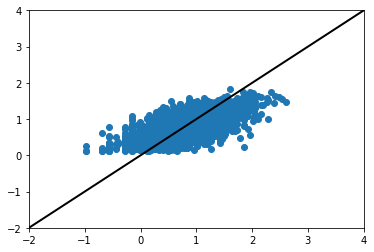

In [59]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 3.1: Validation Set Performance

In [60]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(22, 15),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(15, 10),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(10, 7),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(7, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight
dim_corrected_model[(2)].weight = model[(2)].weight
dim_corrected_model[(4)].weight = model[(4)].weight
dim_corrected_model[(6)].weight = model[(6)].weight

In [61]:
# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 973.6031
[torch.FloatTensor of size 1]

In [62]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2730)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

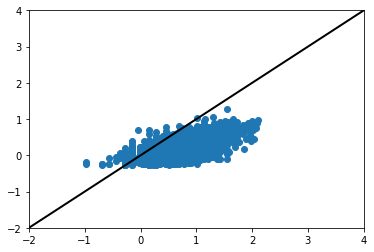

In [63]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 3.2: Test Set Performance

In [64]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model_2 = torch.nn.Sequential(torch.nn.Linear(22, 15),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(15, 10),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(10, 7),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(7, 1))


# Give the new model the old model's parameters
dim_corrected_model_2[(0)].weight = model[(0)].weight
dim_corrected_model_2[(2)].weight = model[(2)].weight
dim_corrected_model_2[(4)].weight = model[(4)].weight
dim_corrected_model_2[(6)].weight = model[(6)].weight

In [65]:
# Get the validation set predictions
y_test_pred = dim_corrected_model_2(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 1187.1211
[torch.FloatTensor of size 1]

In [66]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2724)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.735285 + 6.490682


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

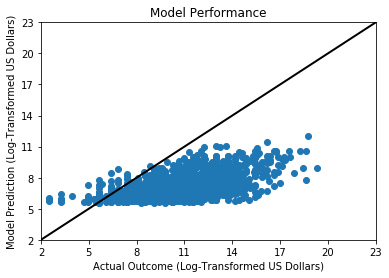

In [67]:
# Plot new predictions versus new data outcomes

plt.scatter(test_outcomes_list, y_test_pred_list)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [68]:
dim_corrected_model_2[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.3057  0.1902 -0.0932  0.0799  0.0171  0.1671  0.0748  0.1467 -0.1155 -0.0056
-0.0335 -0.0318 -0.0928  0.0334 -0.2891 -0.2967 -0.0591  0.1551 -0.0812  0.0641
 0.2126 -0.1221  0.0203 -0.0489  0.0135  0.1160 -0.0278  0.0304 -0.1137 -0.1346
 0.2442  0.0775  0.0924  0.0451 -0.2327  0.0681 -0.0644 -0.1491 -0.1100 -0.0689
 0.1199 -0.0789 -0.1008  0.1604  0.0330  0.1967 -0.0394 -0.0230  0.0430 -0.0364
-0.0649 -0.1769  0.0015  0.0533  0.0854 -0.1427 -0.1248  0.1808 -0.1318  0.0537
 0.1028 -0.0369 -0.0794  0.0692  0.1506 -0.2492  0.0684  0.0076  0.0843 -0.1263
-0.0511  0.0451  0.1090 -0.0639 -0.2953  0.1477 -0.0932  0.1469 -0.1734 -0.0540
 0.0404 -0.0528  0.0794 -0.2267 -0.1555 -0.0188  0.1124 -0.1121  0.0366 -0.1615
-0.0972  0.3458  0.1704  0.2162  0.1936 -0.1988 -0.0484 -0.1639  0.2132 -0.1864
-0.1656 -0.2358 -0.1175 -0.1964  0.2374  0.0084 -0.0668 -0.1264 -0.0739 -0.1374
-0.1587 -0.0470  0.2478  0.2021  0.2298 -0.0683  0.1258 -0.1305 -0.1324 -0.1065
 

In [69]:
dim_corrected_model_2[(2)].weight

Parameter containing:

Columns 0 to 9 
-0.1396 -0.2053 -0.0977  0.1674 -0.1377 -0.0434  0.0978  0.0347  0.0958  0.2028
 0.0856 -0.1480  0.0497 -0.0965 -0.1290 -0.2209 -0.1477 -0.2319  0.2106 -0.2099
-0.2533 -0.0534  0.1759  0.2994  0.1153  0.0432 -0.0650 -0.0195  0.0022 -0.1651
 0.0743 -0.2513  0.2487 -0.0152  0.0611  0.1940  0.0862 -0.2155  0.0825  0.1505
-0.0029  0.0397 -0.2719 -0.0848 -0.1042 -0.1866  0.1874 -0.0936  0.2888 -0.1679
-0.0936 -0.0314  0.1113  0.1039 -0.1964  0.1424  0.1685 -0.2561 -0.0866 -0.2999
 0.2246 -0.0660  0.0777 -0.0964 -0.0130 -0.0566  0.0913 -0.1817 -0.0674  0.3187
-0.0930 -0.0300  0.0471  0.1740 -0.0856 -0.1200 -0.2078 -0.2211  0.1354  0.2724
-0.0298 -0.1133 -0.0111 -0.1134  0.0959 -0.2150 -0.1779 -0.0071 -0.2187  0.2347
 0.1118 -0.1147  0.1399  0.0402  0.0601  0.0403 -0.0103  0.2037  0.1433 -0.1744

Columns 10 to 14 
 0.0136 -0.0044 -0.0653  0.2349  0.0413
 0.1388  0.0456  0.0398 -0.0645  0.0019
 0.2681 -0.0168 -0.2326 -0.0214  0.1744
-0.0203  0.2175  0.190

In [70]:
dim_corrected_model_2[(4)].weight

Parameter containing:
 0.0074 -0.3002  0.0546  0.3034 -0.1253 -0.3309  0.5056 -0.0716  0.0675  0.2666
 0.2446  0.0169  0.0565  0.0664 -0.1971  0.1194  0.0415 -0.3133 -0.2278  0.2210
 0.2843  0.1355  0.1426  0.1238  0.2398 -0.1204 -0.0025 -0.0170  0.3094 -0.2994
 0.2701  0.0334 -0.2716 -0.2814  0.1155  0.1088  0.1070  0.1234  0.0373  0.0713
-0.2287  0.1593  0.1060  0.2640 -0.1902 -0.2774  0.2735 -0.0400 -0.2731 -0.1149
-0.0958 -0.2349 -0.1428  0.2695 -0.1174 -0.2018  0.1723 -0.0784  0.1835 -0.0790
-0.0599 -0.2337  0.2501 -0.0237  0.1068  0.0211 -0.1555 -0.0187  0.2648 -0.3002
[torch.FloatTensor of size 7x10]

In [71]:
dim_corrected_model_2[(6)].weight

Parameter containing:
 0.6039 -0.1351 -0.1386 -0.4056  0.4254  0.3510  0.0423
[torch.FloatTensor of size 1x7]

## Round 4: Four-Hidden-Layer Neural Network

In [72]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [73]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(22, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 10),
                            torch.nn.ReLU(),
                            torch.nn.Linear(10, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 5),
                            torch.nn.ReLU(),
                            torch.nn.Linear(5, 1))

In [74]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 5e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

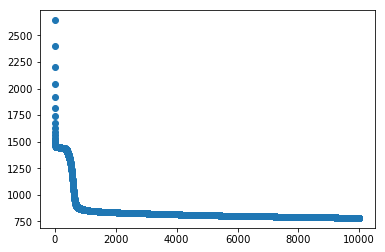

In [75]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [78]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8237)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

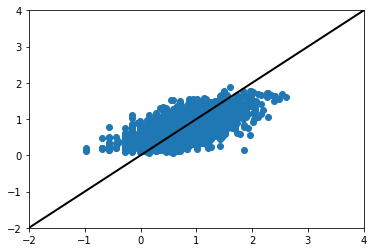

In [79]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 4.1: Validation Set Performance

In [80]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(22, 15),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(15, 10),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(10, 7),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(7, 5),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(5, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight
dim_corrected_model[(2)].weight = model[(2)].weight
dim_corrected_model[(4)].weight = model[(4)].weight
dim_corrected_model[(6)].weight = model[(6)].weight
dim_corrected_model[(8)].weight = model[(8)].weight

In [81]:
# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 1810.0347
[torch.FloatTensor of size 1]

In [82]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2730)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

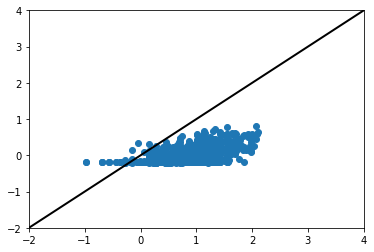

In [83]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 4.2: Test Set Performance

In [84]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model_2 = torch.nn.Sequential(torch.nn.Linear(22, 15),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(15, 10),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(10, 7),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(7, 5),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(5, 1))


# Give the new model the old model's parameters
dim_corrected_model_2[(0)].weight = model[(0)].weight
dim_corrected_model_2[(2)].weight = model[(2)].weight
dim_corrected_model_2[(4)].weight = model[(4)].weight
dim_corrected_model_2[(6)].weight = model[(6)].weight
dim_corrected_model_2[(8)].weight = model[(8)].weight

In [85]:
# Get the validation set predictions
y_test_pred = dim_corrected_model_2(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 578.6070
[torch.FloatTensor of size 1]

In [86]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2724)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.735285 + 6.490682


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

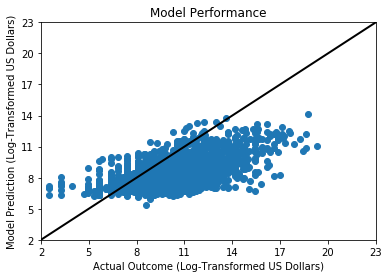

In [87]:
# Plot new predictions versus new data outcomes

plt.scatter(test_outcomes_list, y_test_pred_list)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [88]:
dim_corrected_model_2[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.1931  0.0495  0.1514 -0.1821 -0.2352  0.0213  0.0641  0.1345 -0.0184 -0.0592
 0.0917  0.0162  0.1583  0.1127 -0.0620  0.0401 -0.1424 -0.2006 -0.1880  0.0194
 0.0622  0.4268  0.1038  0.1597  0.1220 -0.2334 -0.0573 -0.0454  0.1115 -0.1835
 0.3746 -0.2044 -0.0619 -0.0528  0.2238  0.0737 -0.0062  0.0934 -0.0425  0.0251
 0.0024 -0.0946  0.0840 -0.2046  0.0298 -0.0885 -0.1545 -0.1071 -0.2181  0.1261
 0.1677  0.0857 -0.2047  0.0221 -0.0526 -0.2985  0.0590 -0.1784 -0.0037  0.0245
-0.0710 -0.1338  0.0784  0.3412  0.4313 -0.0888  0.0669  0.0265  0.1579  0.1188
 0.0171 -0.1430  0.1004  0.2313 -0.1313  0.1224  0.0076  0.2730  0.1178 -0.1980
 0.0034  0.1642 -0.1646 -0.1309 -0.2232  0.0642  0.0591 -0.0636 -0.0316 -0.1815
-0.0741 -0.2284  0.1820 -0.0754  0.2662 -0.1820 -0.0899 -0.0397  0.1717  0.1170
-0.0350 -0.0243 -0.0730 -0.0868  0.2026  0.3224  0.0160 -0.0979  0.0295 -0.1032
-0.3096  0.0162  0.0659 -0.0610 -0.3844 -0.0788 -0.1250  0.0346  0.0821 -0.0169
 

In [89]:
dim_corrected_model_2[(2)].weight

Parameter containing:

Columns 0 to 9 
-0.1397 -0.1422 -0.0928 -0.0772 -0.1375 -0.1916  0.2143 -0.1449  0.2482 -0.2534
-0.0931  0.0464  0.1283 -0.0698 -0.1040 -0.0402  0.2378 -0.2348 -0.1023 -0.1411
 0.2202 -0.0662 -0.2364  0.1268 -0.2045  0.0037  0.0635 -0.1034  0.0538 -0.2518
 0.2012  0.2284 -0.2562  0.0956 -0.0422  0.0501 -0.1514 -0.2118  0.0329 -0.2101
 0.2573 -0.0207  0.1336 -0.2580 -0.0990  0.2434  0.0332 -0.0430  0.1826 -0.2842
-0.0124  0.0607 -0.1602 -0.1656  0.1488  0.2653  0.2003  0.0568 -0.1380  0.0399
 0.0657  0.1935  0.1917  0.0728  0.0233 -0.3351  0.2824 -0.2347 -0.2223 -0.0565
-0.1885 -0.2294 -0.1861  0.2607 -0.2717  0.0965  0.3162  0.2307 -0.2216  0.0336
-0.1477  0.1354 -0.2024  0.1567 -0.2693 -0.1325  0.2638  0.1132 -0.1024  0.0776
-0.0567 -0.0066  0.2242  0.2374  0.0309  0.1696  0.3322 -0.1466  0.2050 -0.1320

Columns 10 to 14 
 0.0178  0.2026  0.0179 -0.1085  0.1862
-0.1320  0.2856  0.2445 -0.0221  0.0107
 0.0474 -0.1614  0.2166 -0.1164 -0.1175
-0.1283  0.1123 -0.102

In [90]:
dim_corrected_model_2[(4)].weight

Parameter containing:
 0.0536  0.2289  0.3004  0.3115  0.1997 -0.1744  0.0346 -0.0682  0.0847 -0.1213
 0.2669  0.1598 -0.3080 -0.0767  0.1723  0.4167 -0.3135  0.1635 -0.2014  0.0010
 0.2786 -0.0515  0.0342  0.0301 -0.0086 -0.1718 -0.2083 -0.1704  0.0690 -0.0622
-0.0578  0.3534 -0.0496 -0.3820 -0.0052 -0.4066  0.3215  0.2907  0.1814  0.4707
 0.1280 -0.0521  0.0009  0.1617  0.0311  0.0060  0.2285  0.2784 -0.0854 -0.2370
 0.1548 -0.0078 -0.1416  0.1643 -0.2729  0.1246 -0.0561 -0.0145  0.2738  0.1197
 0.2181 -0.0397 -0.0631 -0.1529 -0.2349  0.1842  0.2728 -0.2020 -0.1391 -0.1110
[torch.FloatTensor of size 7x10]

In [91]:
dim_corrected_model_2[(6)].weight

Parameter containing:
-0.1774 -0.4416  0.0619  0.5950  0.0045  0.1005  0.1842
-0.1368  0.0705 -0.2776 -0.3312 -0.3016  0.0976  0.0128
 0.2663  0.1084  0.0379 -0.1117 -0.2158 -0.2320  0.2185
-0.0360  0.3693 -0.2174 -0.0674 -0.2770  0.0899 -0.1969
-0.0927 -0.2880 -0.3316  0.5725  0.1250  0.0155 -0.0098
[torch.FloatTensor of size 5x7]

In [92]:
dim_corrected_model_2[(8)].weight

Parameter containing:
 0.6532 -0.0643 -0.2016 -0.1726  0.6220
[torch.FloatTensor of size 1x5]

## Round 5: Five-Hidden-Layer Neural Network

In [93]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [94]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(22, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 10),
                            torch.nn.ReLU(),
                            torch.nn.Linear(10, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 5),
                            torch.nn.ReLU(),
                            torch.nn.Linear(5, 3),
                            torch.nn.ReLU(),
                            torch.nn.Linear(3, 1))

In [95]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 5e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

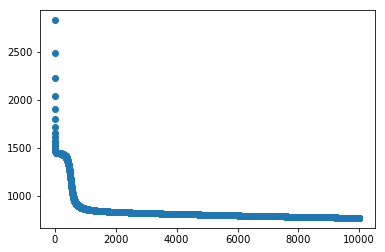

In [96]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [97]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8237)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

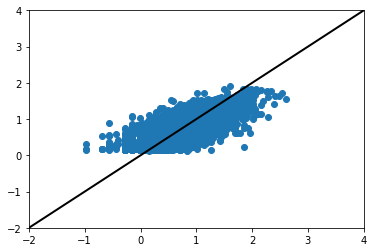

In [98]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 5.1: Validation Set Performance

In [99]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(22, 15),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(15, 10),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(10, 7),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(7, 5),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(5, 3),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(3, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight
dim_corrected_model[(2)].weight = model[(2)].weight
dim_corrected_model[(4)].weight = model[(4)].weight
dim_corrected_model[(6)].weight = model[(6)].weight
dim_corrected_model[(8)].weight = model[(8)].weight
dim_corrected_model[(10)].weight = model[(10)].weight

In [100]:
# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 520.4734
[torch.FloatTensor of size 1]

In [101]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2730)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

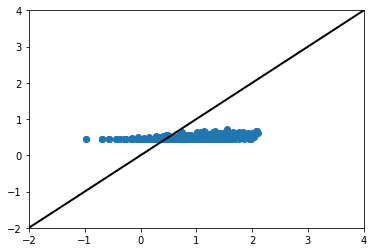

In [102]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 5.2: Test Set Performance

In [103]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model_2 = torch.nn.Sequential(torch.nn.Linear(22, 15),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(15, 10),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(10, 7),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(7, 5),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(5, 3),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(3, 1))


# Give the new model the old model's parameters
dim_corrected_model_2[(0)].weight = model[(0)].weight
dim_corrected_model_2[(2)].weight = model[(2)].weight
dim_corrected_model_2[(4)].weight = model[(4)].weight
dim_corrected_model_2[(6)].weight = model[(6)].weight
dim_corrected_model_2[(8)].weight = model[(8)].weight
dim_corrected_model_2[(10)].weight = model[(10)].weight

In [104]:
# Get the validation set predictions
y_test_pred = dim_corrected_model_2(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 1139.5773
[torch.FloatTensor of size 1]

In [105]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2724)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.735285 + 6.490682


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

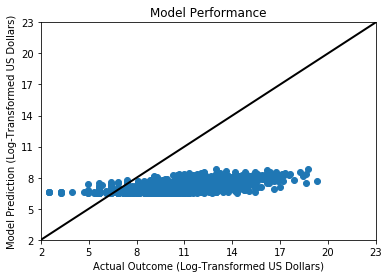

In [106]:
# Plot new predictions versus new data outcomes

plt.scatter(test_outcomes_list, y_test_pred_list)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [107]:
dim_corrected_model_2[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.1365  0.1721  0.1073  0.2454 -0.1239  0.0506 -0.1377 -0.0370 -0.0340 -0.0115
 0.1840 -0.0609  0.1730  0.1832  0.0878 -0.0131  0.1283 -0.0059 -0.1195 -0.1442
-0.2353  0.0058  0.2457  0.0986  0.1895 -0.1010  0.2440 -0.1055  0.0324  0.0486
-0.0120 -0.0952  0.1080  0.1294  0.0390  0.1486 -0.0355  0.0186  0.1173 -0.0968
-0.0151 -0.1204  0.1391  0.2013  0.3087 -0.1647 -0.0723  0.1394 -0.0220  0.0811
 0.1962 -0.1098 -0.1210 -0.1179  0.0007  0.0606  0.0298 -0.1430 -0.1094 -0.0263
-0.0054 -0.0273 -0.1277  0.1875  0.0651 -0.0026 -0.0776  0.0585  0.1931 -0.0071
 0.1641  0.4426 -0.0220  0.1059  0.1505 -0.0252  0.0725 -0.0052  0.0854 -0.0858
-0.1001  0.0243  0.0940 -0.1774 -0.0436  0.1218 -0.0756  0.2211 -0.1537 -0.0184
-0.0272 -0.0140 -0.1876 -0.1704 -0.2431 -0.1908  0.1706 -0.1218 -0.0835  0.1454
 0.1610 -0.0523  0.2784  0.2198  0.0636  0.0465 -0.2049 -0.0486 -0.0408 -0.0775
-0.0039  0.2150  0.0390 -0.0567 -0.0199 -0.0130  0.0092  0.0913 -0.0615  0.1724
-

In [108]:
dim_corrected_model_2[(2)].weight

Parameter containing:

Columns 0 to 9 
-0.0034  0.0668 -0.1165  0.1315  0.1674  0.0521 -0.1783  0.0385 -0.0595  0.0201
-0.1064  0.3807  0.0078  0.1398  0.3833  0.1098  0.2443  0.2602  0.1539  0.0384
 0.1399 -0.0661  0.0934 -0.0034 -0.0015  0.2395  0.2674  0.0029  0.3316  0.2228
 0.2575  0.0037  0.0354  0.0354 -0.1619 -0.2521  0.1982  0.1188 -0.2002  0.1601
 0.1002 -0.1244  0.1429 -0.2954  0.2041  0.1649  0.2306  0.1642 -0.1791 -0.1548
 0.2146  0.2592  0.2483  0.0346 -0.1572  0.1161 -0.2526 -0.2290 -0.1967 -0.0444
 0.0050  0.1856  0.1639 -0.2134 -0.0448  0.1551 -0.1353  0.0043 -0.2295 -0.2411
-0.0945  0.2143  0.2530 -0.0699 -0.1548 -0.2716  0.0695  0.1096 -0.2015 -0.0136
 0.1132 -0.1821  0.2908 -0.1981  0.0358 -0.0366 -0.1731 -0.1378 -0.0278 -0.1187
-0.1649 -0.1115  0.1078 -0.2313 -0.2636 -0.2278  0.1725  0.2235 -0.2300 -0.2234

Columns 10 to 14 
 0.0305 -0.1098 -0.0071  0.0404 -0.0952
 0.3740  0.2008  0.1053 -0.0693 -0.1917
-0.0897 -0.2062 -0.1279 -0.0096  0.1326
 0.0930  0.0907 -0.071

In [109]:
dim_corrected_model_2[(4)].weight

Parameter containing:
 0.3048  0.0851 -0.2878  0.1524  0.4588  0.1651  0.0127  0.2046  0.1168  0.3376
 0.1229 -0.2246  0.1190 -0.1867  0.2194 -0.0738  0.0004  0.2970  0.0300 -0.0656
-0.0641  0.4398 -0.2142 -0.3573 -0.1299 -0.0822  0.1283  0.1382  0.2594  0.0513
-0.1591 -0.0786 -0.0431 -0.2909  0.1961 -0.0260 -0.0735 -0.1401  0.2608 -0.2755
-0.1978 -0.1131  0.1952 -0.0771 -0.0994  0.2731  0.1393 -0.2470  0.1484 -0.0617
-0.2525  0.2899 -0.3373 -0.3457  0.3241 -0.3622 -0.2827  0.1412 -0.1112 -0.1158
-0.1939  0.3304 -0.0512 -0.1488 -0.1770 -0.0952  0.0128 -0.3284 -0.2003  0.2302
[torch.FloatTensor of size 7x10]

In [110]:
dim_corrected_model_2[(6)].weight

Parameter containing:
 0.4522 -0.1086  0.1229 -0.0584 -0.2079  0.3001  0.3314
-0.2747  0.3143  0.0852 -0.2490  0.0577  0.1148  0.0507
 0.5179  0.2151  0.0625 -0.3282  0.1852  0.3890  0.1325
-0.3354  0.3059 -0.6109  0.0548 -0.3006 -0.2917  0.5164
 0.2538  0.0586 -0.3187  0.0253 -0.2005  0.1920 -0.2202
[torch.FloatTensor of size 5x7]

In [111]:
dim_corrected_model_2[(8)].weight

Parameter containing:
 0.3558  0.1803  0.4554 -0.4477  0.1535
 0.0542 -0.0718 -0.4130  0.3480  0.1945
-0.4652 -0.0590 -0.1459  0.7735 -0.0626
[torch.FloatTensor of size 3x5]

In [112]:
dim_corrected_model_2[(10)].weight

Parameter containing:
 0.7014 -0.4325 -0.8755
[torch.FloatTensor of size 1x3]

## Round 6: Six-Hidden-Layer Neural Network

In [113]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [114]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(22, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 10),
                            torch.nn.ReLU(),
                            torch.nn.Linear(10, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 5),
                            torch.nn.ReLU(),
                            torch.nn.Linear(5, 3),
                            torch.nn.ReLU(),
                            torch.nn.Linear(3, 2),
                            torch.nn.ReLU(),
                            torch.nn.Linear(2, 1))

In [115]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 5e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

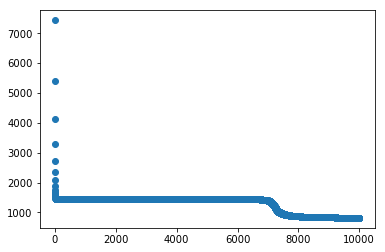

In [116]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [117]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8237)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

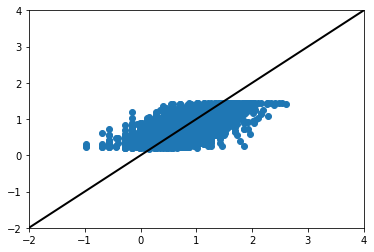

In [118]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 6.1: Validation Set Performance

In [119]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(22, 15),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(15, 10),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(10, 7),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(7, 5),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(5, 3),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(3, 2),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(2, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight
dim_corrected_model[(2)].weight = model[(2)].weight
dim_corrected_model[(4)].weight = model[(4)].weight
dim_corrected_model[(6)].weight = model[(6)].weight
dim_corrected_model[(8)].weight = model[(8)].weight
dim_corrected_model[(10)].weight = model[(10)].weight
dim_corrected_model[(12)].weight = model[(12)].weight

In [120]:
# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 6674.4258
[torch.FloatTensor of size 1]

In [121]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2730)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

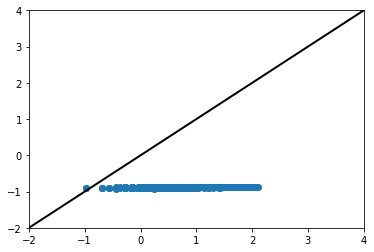

In [122]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 6.2: Test Set Performance

In [123]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model_2 = torch.nn.Sequential(torch.nn.Linear(22, 15),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(15, 10),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(10, 7),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(7, 5),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(5, 3),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(3, 2),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(2, 1))


# Give the new model the old model's parameters
dim_corrected_model_2[(0)].weight = model[(0)].weight
dim_corrected_model_2[(2)].weight = model[(2)].weight
dim_corrected_model_2[(4)].weight = model[(4)].weight
dim_corrected_model_2[(6)].weight = model[(6)].weight
dim_corrected_model_2[(8)].weight = model[(8)].weight
dim_corrected_model_2[(10)].weight = model[(10)].weight
dim_corrected_model_2[(12)].weight = model[(12)].weight

In [124]:
# Get the validation set predictions
y_test_pred = dim_corrected_model_2(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 9464.8896
[torch.FloatTensor of size 1]

In [125]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2724)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.735285 + 6.490682


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

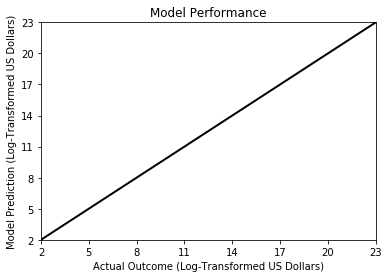

In [126]:
# Plot new predictions versus new data outcomes

plt.scatter(test_outcomes_list, y_test_pred_list)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [127]:
dim_corrected_model_2[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.1395 -0.0020 -0.1187  0.2090  0.2935 -0.1096 -0.0943  0.0782  0.1184  0.1218
-0.0564  0.1741  0.1029  0.0360 -0.1471 -0.0748 -0.1352 -0.0481 -0.0424  0.0851
 0.1695 -0.0582 -0.0013  0.0049 -0.1993 -0.2402 -0.0196 -0.1257  0.0873  0.1517
-0.1457 -0.0008 -0.2944 -0.1739  0.0491 -0.0648  0.0421  0.1171  0.0073 -0.1603
 0.1511 -0.0549 -0.0668  0.0818  0.0436  0.0747 -0.0111  0.0391 -0.0705  0.1020
 0.0773  0.0533  0.1384  0.2499  0.3437 -0.0425  0.0782  0.0225 -0.0018 -0.0433
-0.1606  0.0382 -0.1085  0.0423 -0.2160  0.1138  0.0793  0.1501  0.1054  0.1610
-0.0869 -0.1824 -0.1074  0.2605 -0.1393  0.0022  0.0400  0.0133 -0.0949 -0.1451
-0.1650 -0.1384  0.2317 -0.2925  0.1024  0.1751  0.1030  0.1531  0.0250  0.0866
 0.0979 -0.0519  0.0354 -0.1536 -0.0501  0.1955 -0.1662  0.0086  0.1531  0.1471
 0.1553 -0.0698  0.0049  0.0222 -0.0765  0.0968  0.2098 -0.1588  0.1036  0.0238
-0.1310 -0.0711  0.0583 -0.1412 -0.2494  0.0195 -0.1759 -0.1180 -0.1984  0.0978
-

In [128]:
dim_corrected_model_2[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.0321 -0.1495  0.0095 -0.1313 -0.1380  0.2743  0.0406  0.1791 -0.0774 -0.1842
 0.1847 -0.2494 -0.1053 -0.0297 -0.0869 -0.1056 -0.1000 -0.1208 -0.2379 -0.2557
-0.0286  0.0830  0.2635  0.1790 -0.1414 -0.0584 -0.2484 -0.1661  0.2216 -0.0741
-0.0326  0.2456  0.2455  0.1837 -0.0861  0.0335 -0.0804  0.2362 -0.0788 -0.1997
-0.1088 -0.1627  0.0916 -0.1828  0.0076  0.0332 -0.0783  0.0023  0.2042 -0.1652
-0.2426  0.0450 -0.0518  0.2313  0.0210 -0.0317  0.1486 -0.0745  0.0892  0.0527
 0.1444 -0.0178 -0.0393  0.0449  0.1567 -0.2350 -0.0099  0.2148 -0.2274 -0.0513
-0.1366  0.1553  0.1922 -0.0963  0.0922  0.1494 -0.1049  0.0535  0.1628  0.1117
 0.0049 -0.0711 -0.1847 -0.1224 -0.1524 -0.1329  0.1008 -0.0249  0.0441 -0.0916
-0.2063  0.0825  0.3084  0.1171 -0.0727 -0.2489  0.0015  0.0970  0.0540 -0.0636

Columns 10 to 14 
 0.1151 -0.0457 -0.1616 -0.1140 -0.0946
-0.0607 -0.1406 -0.2038 -0.1070  0.0052
 0.0921 -0.1780 -0.1208 -0.1617  0.0756
 0.0960 -0.1247  0.026

In [129]:
dim_corrected_model_2[(4)].weight

Parameter containing:
-0.3297 -0.1762  0.1290 -0.1373 -0.2814  0.3068 -0.2969  0.0452 -0.0236 -0.0304
-0.0900  0.1876 -0.3197  0.2607  0.1147  0.2544 -0.1375 -0.0191  0.2277  0.5574
 0.2614 -0.0774 -0.3098 -0.1484 -0.3104  0.0760  0.1203  0.1771  0.1287  0.1737
-0.0111 -0.2020 -0.0860  0.0691 -0.1779 -0.0168  0.1194 -0.2474 -0.2469 -0.1365
-0.2336 -0.0797 -0.1748  0.1263  0.1861  0.2100  0.2240 -0.2183  0.2819  0.3749
-0.1658  0.3047  0.3049 -0.2253 -0.1408  0.2892 -0.0356 -0.1327  0.0820 -0.2180
-0.1469  0.0359 -0.2334  0.3219 -0.2161  0.0308  0.1931 -0.0987 -0.0099  0.0985
[torch.FloatTensor of size 7x10]

In [130]:
dim_corrected_model_2[(6)].weight

Parameter containing:
-0.2278  0.0800  0.1781 -0.0802  0.1803  0.3084  0.1305
 0.2363  0.4052  0.1906 -0.1611  0.2843 -0.1268 -0.2087
 0.1407  0.2067  0.3209 -0.1414  0.0369  0.0007  0.0532
 0.0903 -0.3356  0.2496  0.2120 -0.5625 -0.0213 -0.1812
 0.3148 -0.2378  0.2244 -0.2025  0.1814 -0.0249 -0.3759
[torch.FloatTensor of size 5x7]

In [131]:
dim_corrected_model_2[(8)].weight

Parameter containing:
-0.3957  0.1906  0.2285 -0.2690  0.3153
 0.2123 -0.3920 -0.2229  0.5709  0.2346
 0.1031 -0.2941 -0.1713  0.1863  0.3238
[torch.FloatTensor of size 3x5]

In [132]:
dim_corrected_model_2[(10)].weight

Parameter containing:
 0.3172 -0.7216 -0.6440
 0.5278 -0.5257 -0.1290
[torch.FloatTensor of size 2x3]

In [133]:
dim_corrected_model_2[(12)].weight

Parameter containing:
-1.1327 -0.6576
[torch.FloatTensor of size 1x2]

## Round 7: Linear Regression

In [134]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [135]:
# Make the neural network - really a regression
model = torch.nn.Sequential(torch.nn.Linear(22, 1))

In [136]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 4e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

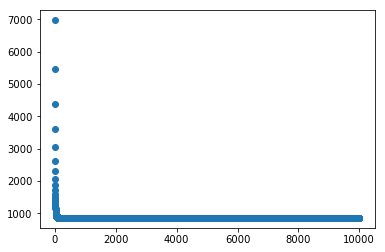

In [137]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [138]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8237)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

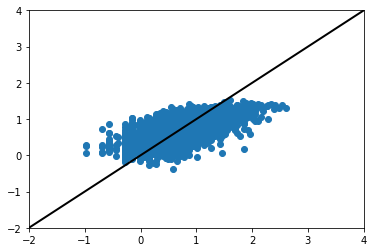

In [139]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 7.1: Validation Set Performance

In [140]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(22, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight

In [141]:
# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 687.2926
[torch.FloatTensor of size 1]

In [142]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2730)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

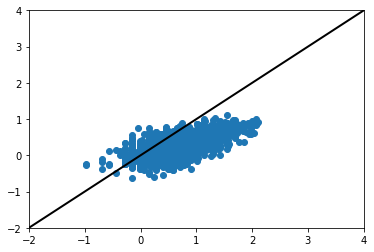

In [143]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 7.2: Test Set Performance

In [144]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model_2 = torch.nn.Sequential(torch.nn.Linear(22, 1))


# Give the new model the old model's parameters
dim_corrected_model_2[(0)].weight = model[(0)].weight

In [145]:
# Get the validation set predictions
y_test_pred = dim_corrected_model_2(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 1402.5018
[torch.FloatTensor of size 1]

In [146]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2724)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.735285 + 6.490682


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

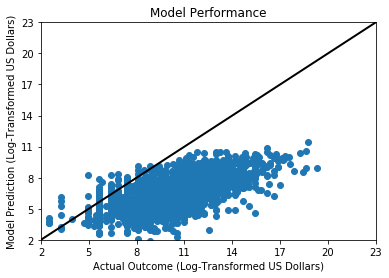

In [147]:
# Plot new predictions versus new data outcomes

plt.scatter(test_outcomes_list, y_test_pred_list)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [148]:
dim_corrected_model_2[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.0114  0.0031  0.0116  0.1374  0.1667 -0.0259 -0.0018  0.0032  0.0595 -0.0157

Columns 10 to 19 
 0.0523 -0.0143  0.0241 -0.0237  0.0013 -0.0051  0.0031  0.0079 -0.0088  0.0093

Columns 20 to 21 
 0.0090  0.0092
[torch.FloatTensor of size 1x22]